In [ ]:
!pip install kagglehub
import kagglehub


In [ ]:

path = kagglehub.dataset_download("danushkumarv/indian-monuments-image-dataset")
print("Path to dataset files:", path)


100%|██████████| 621M/621M [00:08<00:00, 78.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1


In [8]:
import os

root_dir = "/root/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1"

# checking the folders inside the main dataset obtained from the kagglehub
print(os.listdir(root_dir))
# ['Indian-monuments'] is a subfolder present in it, so add it in the root_dir to access the training and testing data


indian_monuments_dir = os.path.join(root_dir, "Indian-monuments")
print("Contents inside Indian-monuments folder:", os.listdir(indian_monuments_dir))

images_dir = os.path.join(indian_monuments_dir, "images")
print("Contents inside images folder:", os.listdir(images_dir))
# contents are train and test, so add them to the "indian_monuments_dir" path


train_dir = os.path.join(images_dir, "train")
test_dir = os.path.join(images_dir, "test")

# verifying if all the monuments are present in both training and testing dataset
print("Train classes:", os.listdir(train_dir)[:5])
print("Test classes:", os.listdir(test_dir)[:5])


['Indian-monuments']
Contents inside Indian-monuments folder: ['images']
Contents inside images folder: ['train', 'test']
Train classes: ['Charar-E- Sharif', 'alai_darwaza', 'victoria memorial', 'tajmahal', 'tanjavur temple']
Test classes: ['Charar-E- Sharif', 'alai_darwaza', 'victoria memorial', 'tajmahal', 'tanjavur temple']


In [9]:
# Necessary general imports
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [13]:


# get all the class names of the training set.

data_dir = pathlib.Path(train_dir)
# this above code converts the string path in "train_dir" to a Path object(for robust file operations).

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# here .glob("*") finds all the immediate children the data_dir object.

print(class_names)



['Ajanta Caves' 'Charar-E- Sharif' 'Chhota_Imambara' 'Ellora Caves'
 'Fatehpur Sikri' 'Gateway of India' 'Humayun_s Tomb' 'India gate pics'
 'Khajuraho' 'Sun Temple Konark' 'alai_darwaza' 'alai_minar'
 'basilica_of_bom_jesus' 'charminar' 'golden temple' 'hawa mahal pics'
 'iron_pillar' 'jamali_kamali_tomb' 'lotus_temple' 'mysore_palace'
 'qutub_minar' 'tajmahal' 'tanjavur temple' 'victoria memorial']


In [16]:

# this function is to just view random images in the training set
def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image filename from the class directory
    random_image = random.sample(os.listdir(target_folder), 1)
    image_path = os.path.join(target_folder, random_image[0])

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")  # Show the shape of the image

    return img


Image shape: (183, 276, 3)


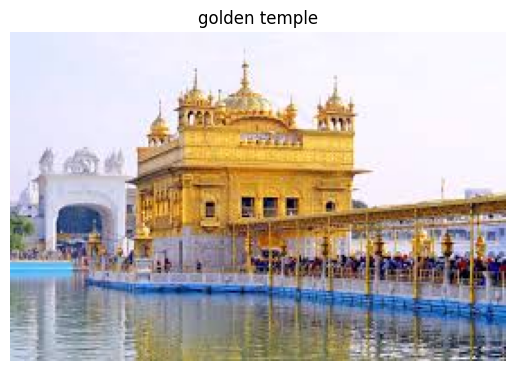

In [19]:
 #View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) # get a random class name

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)


Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')




Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [27]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

In [28]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.1418 - loss: 4.2578 - val_accuracy: 0.2469 - val_loss: 2.9809
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.5534 - loss: 1.6186 - val_accuracy: 0.3432 - val_loss: 3.2004
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.8000 - loss: 0.7534 - val_accuracy: 0.4004 - val_loss: 3.6907
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9409 - loss: 0.2947 - val_accuracy: 0.4290 - val_loss: 4.3368
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9830 - loss: 0.1204 - val_accuracy: 0.4080 - val_loss: 5.2418


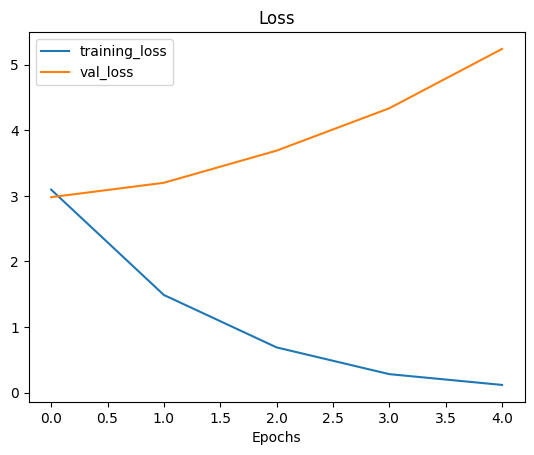

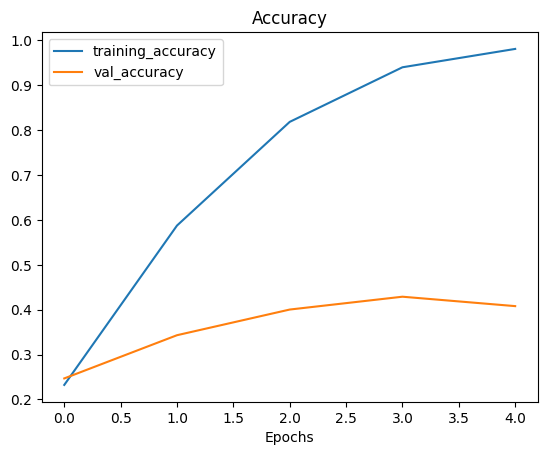

In [29]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_10)

In [30]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


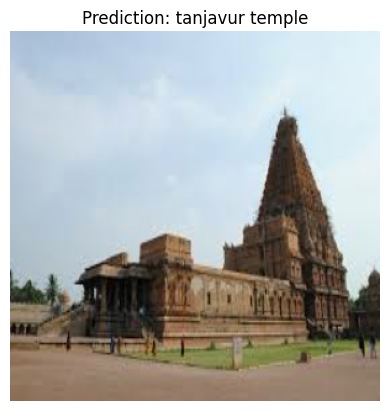

In [32]:


# make a new prediction
pred_and_plot(model_10, test_dir+"/tanjavur temple/20.jpeg", class_names)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


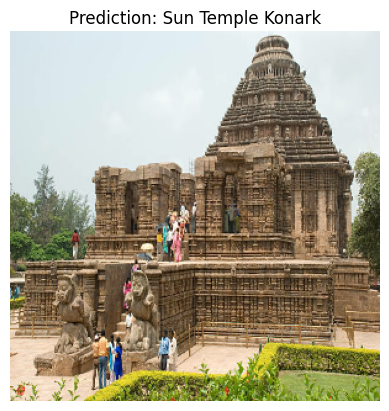

In [34]:
pred_and_plot(model_10, test_dir+"/Sun Temple Konark/14.jpg", class_names)

In [1]:
model.save('backend/model/my_model.h5')


NameError: name 'model' is not defined